In [161]:
import numpy as np
import pandas as pd
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from google.cloud import bigquery
from bq_helper import BigQueryHelper
%load_ext google.cloud.bigquery
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="My Project-bbdce7b1712b.json"


The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [162]:
bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")

## We are only looking at SF Data
query="""
SELECT * FROM `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
where state_name ="California" AND city_name="San Francisco"
"""

df = bq_assistant.query_to_pandas(query)
##df=pd.read_csv('carbon-monoxide-results-20181007-145932.csv')

In [163]:
df.shape

(32794, 29)

Check the no of missing values in each column

In [164]:
df.isna().sum()

state_code                 0
county_code                0
site_num                   0
parameter_code             0
poc                        0
latitude                   0
longitude                  0
datum                      0
parameter_name             0
sample_duration            0
pollutant_standard         0
date_local                 0
units_of_measure           0
event_type                 0
observation_count          0
observation_percent        0
arithmetic_mean            0
first_max_value            0
first_max_hour             0
aqi                    16396
method_code            16398
method_name                0
local_site_name            0
address                    0
state_name                 0
county_name                0
city_name                  0
cbsa_name                  0
date_of_last_change        0
dtype: int64

# Data Preprocessing

Remove Missing values in aqi ( Dont Uncomment this)

In [165]:
# from sklearn.preprocessing import Imputer

# imp=Imputer(missing_values='NaN',strategy='mean')

# ## replace missing values in aqi and method code with mean
# df["aqi"]=imp.fit_transform(df[["aqi"]]).ravel()
# df["method_code"]=imp.fit_transform(df[["method_code"]]).ravel()


## Data Visualization

We will measure average aqi for different gases (CO,O3,NO2,SO2)

# Bar Graph for the average AQI over the years for the 4 gases

In [166]:
# For visualization
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6, brewer
from bokeh.transform import factor_cmap


Avg Air Quality Index for CO over the years in San Francisco

In [167]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_co = bq_assistant.query_to_pandas(QUERY)

In [168]:
df_co.year = df_co.year.astype(str)

In [169]:
## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_CO_over_the_years.html')

source = ColumnDataSource(df_co)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Carbon monoxide in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Carbon monoxide"

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


Avg Air Quality Index for O3 over the years in San Francisco

In [170]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_o3 = bq_assistant.query_to_pandas(QUERY)



In [171]:
df_o3.year = df_o3.year.astype(str)

In [172]:
## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_O3_over_the_years.html')

source = ColumnDataSource(df_o3)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Ozone in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Ozone"

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


Avg Air Quality Index for NO2 over the years in San Francisco

In [173]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.no2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_no2 = bq_assistant.query_to_pandas(QUERY)



In [174]:
df_no2.year = df_no2.year.astype(str)

In [175]:
## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_no2_over_the_years.html')

source = ColumnDataSource(df_no2)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Nitrogen dioxide  in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Nitrogen dioxide "

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [176]:
##Avg Air Quality Index for SO2 over the years in San Francisco

QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.so2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_so2 = bq_assistant.query_to_pandas(QUERY)

df_so2.year = df_so2.year.astype(str)

## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_so2_over_the_years.html')

source = ColumnDataSource(df_so2)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Sulphur dioxide  in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Sulphur dioxide "

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


Avg Air Quality Index for Particulate Matter over the years in San Francisco

In [177]:
##Avg Air Quality Index for Particulate Matter over the years in San Francisco

QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_pm25 = bq_assistant.query_to_pandas(QUERY)

df_pm25.year = df_pm25.year.astype(str)

## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_pm25_over_the_years.html')

source = ColumnDataSource(df_pm25)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Particulate Matter in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Particulate Matter"

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [178]:
## RENAME THE COLUMNS OF THE 4 DFS 
## https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
df_co.rename(columns={'avg_aqi': 'avg_aqi_CO'},inplace=True)
df_no2.rename(columns={'avg_aqi': 'avg_aqi_NO2'},inplace=True)
df_o3.rename(columns={'avg_aqi': 'avg_aqi_O3'},inplace=True)
df_so2.rename(columns={'avg_aqi': 'avg_aqi_SO2'},inplace=True)
df_pm25.rename(columns={'avg_aqi': 'avg_aqi_PM25'},inplace=True)

# Compare the Time Series Graphs of all the 5  

In [179]:
## Combine the dataframes ie all 3
from functools import reduce

## Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
frames=[df_co,df_no2,df_o3]
df_final = reduce(lambda left,right: pd.merge(left,right,on='year'), frames)


In [180]:
df_final

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3
0,1990,26.142462,33.198795,16.027473
1,1991,25.517808,36.589041,16.876033
2,1992,23.959016,32.331507,17.707521
3,1993,21.395890,34.211594,17.424658
4,1994,17.242678,32.905292,17.675978
5,1995,16.334247,32.299451,22.506849
6,1996,15.553279,32.713115,22.308743
7,1997,13.957534,30.379501,20.465753
8,1998,13.384615,29.945205,21.254795
9,1999,13.869863,32.112329,22.156164


In [181]:
colors = ['red', 'blue', 'green']
labels=['CARBON MONOXIDE','NITROGEN DIOXIDE','OZONE']

cols=df_final.columns.tolist()
cols.remove('year')

In [182]:
output_file('COMPARISON_AQI.html')

##https://www.geeksforgeeks.org/python-iterate-multiple-lists-simultaneously/
l = figure(title="COMPARISON OF AQI OF DIFFERENT GASES FROM 1990 TO 2017", logo=None,width=1000, height=500)

for color,label,col in zip(colors, labels, cols):
    source = ColumnDataSource(data=dict(x=df_final['year'].tolist(), y=df_final[col].tolist())) 
    l.line(x='x',y='y',source=source, legend=label, color=color,line_width=5)

source = ColumnDataSource(data=dict(x=df_so2['year'].tolist(), y=df_so2['avg_aqi_SO2'].tolist()))
l.line(x='x',y='y',source=source, legend='SULPHUR DIOXIDE', color="magenta",line_width=5)

source = ColumnDataSource(data=dict(x=df_pm25['year'].tolist(), y=df_pm25['avg_aqi_PM25'].tolist()))
l.line(x='x',y='y',source=source, legend='PARTICULATE MATTER', color="indigo",line_width=5)

l.xaxis.axis_label = 'YEAR'
l.yaxis.axis_label = "AVERAGE AQI"
l.title.text ='Comparison of AQI of CO,O3,NO2,SO2 AND PM'

l.legend.location = "top_right"
l.legend.click_policy="hide"

show(l)

DONT GO BEYOND THIS FOR NOW

In [183]:
result = pd.merge(df_final, df_so2, how='left', on='year')
df_merged = pd.merge(result, df_pm25, how='left', on='year')
df_merged

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25
0,1990,26.142462,33.198795,16.027473,6.430986,NaN
1,1991,25.517808,36.589041,16.876033,7.328221,NaN
2,1992,23.959016,32.331507,17.707521,7.445355,NaN
3,1993,21.395890,34.211594,17.424658,6.323288,NaN
4,1994,17.242678,32.905292,17.675978,3.515320,NaN
5,1995,16.334247,32.299451,22.506849,5.591781,NaN
6,1996,15.553279,32.713115,22.308743,4.879781,NaN
7,1997,13.957534,30.379501,20.465753,4.806094,NaN
8,1998,13.384615,29.945205,21.254795,4.076712,NaN
9,1999,13.869863,32.112329,22.156164,6.038356,55.623529


Impute missing values in so2 and pm25

In [184]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')

## replace missing values in aqi and method code with mean
df_merged["avg_aqi_SO2"]=imp.fit_transform(df_merged[["avg_aqi_SO2"]]).ravel()
df_merged["avg_aqi_PM25"]=imp.fit_transform(df_merged[["avg_aqi_PM25"]]).ravel()


In [185]:
df_merged

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25
0,1990,26.142462,33.198795,16.027473,6.430986,40.171730
1,1991,25.517808,36.589041,16.876033,7.328221,40.171730
2,1992,23.959016,32.331507,17.707521,7.445355,40.171730
3,1993,21.395890,34.211594,17.424658,6.323288,40.171730
4,1994,17.242678,32.905292,17.675978,3.515320,40.171730
5,1995,16.334247,32.299451,22.506849,5.591781,40.171730
6,1996,15.553279,32.713115,22.308743,4.879781,40.171730
7,1997,13.957534,30.379501,20.465753,4.806094,40.171730
8,1998,13.384615,29.945205,21.254795,4.076712,40.171730
9,1999,13.869863,32.112329,22.156164,6.038356,55.623529


SF INCIDENTS DATABASE INCIDENTS PER YEAR

In [186]:
query_sf=""" SELECT EXTRACT(YEAR FROM timestamp) as year,count(distinct unique_key) as no_of_incidents
FROM `bigquery-public-data.san_francisco.sfpd_incidents`
group by year
order by year asc 
"""

df_sf_incidents = bq_assistant.query_to_pandas(query_sf)


In [187]:
df_sf_incidents.year = df_sf_incidents.year.astype(str)
df_combined = pd.merge(df_merged, df_sf_incidents, how='left', on='year')


In [188]:
df_combined["no_of_incidents"]=imp.fit_transform(df_combined[["no_of_incidents"]]).ravel()


In [190]:
## Convert string object to int
df_combined.year=df_combined['year'].astype(str).astype(int)

Applying Regression

In [191]:

## Serialize df to a pickle object
## Skip every line above
import pickle

picle_out=open('df_merged_frame.pickle','wb')
pickle.dump(df_combined,picle_out)
picle_out.close()

In [192]:
## Deserialize the pickle object to get back the data frame
picle_in=open('df_merged_frame.pickle','rb')
df=pickle.load(picle_in)

In [193]:
df.columns

Index(['year', 'avg_aqi_CO', 'avg_aqi_NO2', 'avg_aqi_O3', 'avg_aqi_SO2',
       'avg_aqi_PM25', 'no_of_incidents'],
      dtype='object')

In [194]:
cols=['year', 'avg_aqi_CO', 'avg_aqi_NO2', 'avg_aqi_O3', 'avg_aqi_SO2',
       'avg_aqi_PM25']

In [195]:
X=df[cols]

In [196]:
Y=df['no_of_incidents']

In [197]:
X.shape

(28, 6)

In [198]:
Y.shape

(28,)

In [199]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        no_of_incidents   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4420.
Date:                Tue, 20 Nov 2018   Prob (F-statistic):           9.87e-33
Time:                        18:31:03   Log-Likelihood:                -266.46
No. Observations:                  28   AIC:                             544.9
Df Residuals:                      22   BIC:                             552.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year            56.0267     11.063      5.064      0.000      33.083      78.971
avg_aqi_CO    1242.2411    322.886      3.847      0.001     572.617    1911.865
avg_aqi_NO2  -1232.5526    420.396     -2.932      0.008   -2104.401    -360.704
avg_aqi_O3     944.8298    641.277      1.473      0.155    -385.098    2274.757
avg_aqi_SO2  -1509.5452    923.027     -1.635      0.116   -3423.786     404.695
avg_aqi_PM25   239.9164    160.709      1.493      0.150     -93.374     573.207
==============================================================================
Omnibus:                        0.379   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.150
Skew:                          -0.175   Prob(JB):                        0.928
Kurtosis:                       2.925   Cond. No.                     2.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

predictions = lm.predict(X)
print('Accuracy of model=',lm.score(X,Y))


Accuracy of model= 0.4272466549356745


In [218]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(22, 6) (22,)
(6, 6) (6,)


In [219]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0,0.5,'Predictions')

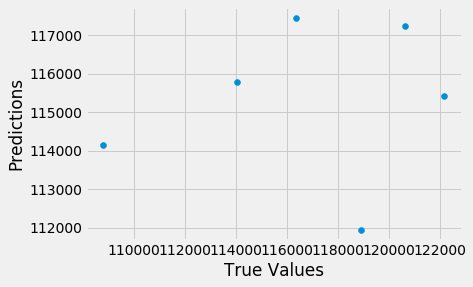

In [220]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [222]:
## R2 score Evaluation
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

from sklearn.metrics import r2_score

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))


r2 train: 0.492, test : -0.154


In [ ]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        avg(aqi) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_co = bq_assistant.query_to_pandas(QUERY)

plt.subplots(figsize=(15,7))
sns.barplot(x='year',y='avg_aqi',data=df_co,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Air Quality Index', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=20)
plt.title('Average AQI of Carbon monoxide in different years', fontsize=24)
plt.show()

In [ ]:
QUERY = """
   SELECT EXTRACT(month FROM co_summary.date_local) as month,avg(co_summary.aqi) as avg_aqi
FROM `bigquery-public-data.epa_historical_air_quality.co_daily_summary` as co_summary
where state_name ="California" AND city_name="San Francisco" and  EXTRACT(YEAR FROM co_summary.date_local)=2016
group by month
order by month asc
        """
df_co_month = bq_assistant.query_to_pandas(QUERY)

plt.subplots(figsize=(15,7))
sns.barplot(x='month',y='avg_aqi',data=df_co_month,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Air Quality Index', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Month', fontsize=20)
plt.title('Average AQI of Carbon monoxide in 2016 in  different months', fontsize=24)
plt.show()


In [ ]:
df.isnull().sum()

In [ ]:
## Fill missing values with zero
df["aqi"].fillna(0, inplace=True)
df["method_code"].fillna(0, inplace=True)


In [ ]:
df.describe()

In [ ]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)


In [ ]:
missing_value_df

In [ ]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')

df["aqi"]=imp.fit_transform(df[["aqi"]]).ravel()
df["method_code"]=imp.fit_transform(df[["method_code"]]).ravel()


In [ ]:
set(df['county_code'])

In [ ]:
df.nunique()

In [ ]:
df_co